# Python para Analise de Dados

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Carregando o Primeiro Dataset Pedidos

orders = pd.read_csv("datasets/olist_orders_dataset.csv")
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [15]:
# Carregando o Dataset de Itens Pedidos

orders_items = pd.read_csv("datasets/olist_order_items_dataset.csv")
orders_items.head(3)

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.0,17.87


## Opções de Merge

**Tipos de join (ligações)**
> - **INNER JOIN** (Padrão) - Retorna apenas os registros que contém a mesma chave em ambos os DataFrames.
> - **LEFT JOIN** - Retorna todos os registros do DataFrame à esquerda independente se contém um correspondente à direita.
> - **RIGHT JOIN** - Retorna todos os registros do DataFrame à direita independente se contém um correspondente à esquerda.
> - **OUTER JOIN** - Retorna todos os registros de ambos os DataFrames.

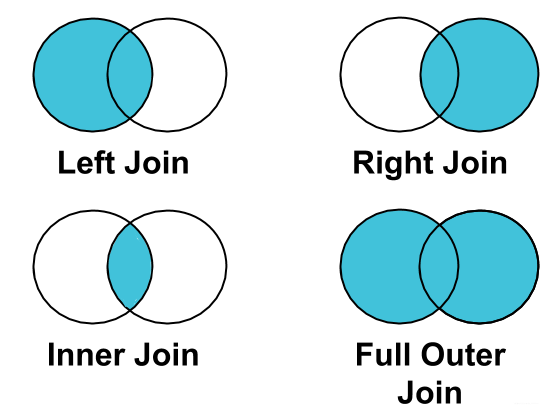

In [18]:
# Importando uma Imagem de Exemplo
from IPython.display import Image
Image('imagen.png')

**Consultando os dados nos dois datasets e ligando através da chave order_id**
- Selecionando os atributos do dataset **orders (pedidos)**.
> - order_id (id do pedido).
> - order_status (status do pedido).
> - order_approved_at (data e hora da aprovação do pedido).

- Selecionando os atributos do dataset **orders_items (itens do pedidos)**.
> - product_id (id do produto).
> - seller_id (id do vendedor).
> - price (preço do produto).
> - freight_value (valor do frete).

### **Inner**

In [23]:
# Merge com Inner Join
# Por Padrão se eu não especifica nada o merge sera feito com (inner join)

query = pd.merge(orders[['order_id', 'order_status', 'order_approved_at']],
                
                 orders_items[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']],
                 on  ='order_id')

# on = Atributo de Ligação
# how = Tipo de Ligação

query.head()

,order_id,order_status,order_approved_at,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


In [24]:
# Merge com Inner Join

query = pd.merge(orders[['order_id', 'order_status', 'order_approved_at']],
                
                 orders_items[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']],
                 on  ='order_id',
                 how = 'inner')

# on = Atributo de Ligação
# how = Tipo de Ligação

query.head()

,order_id,order_status,order_approved_at,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


In [25]:
# Analisando se existe valores nulos ausentes
query.isnull().sum()

order_id              0
order_status          0
order_approved_at    15
product_id            0
seller_id             0
price                 0
freight_value         0
dtype: int64

### Left Join

**Consulta todos os pedidos independente se contém itens associados - Left Join**

In [26]:
# Merge com left join

query = pd.merge(orders[['order_id', 'order_status', 'order_approved_at']],
                
                 orders_items[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']],
                 on  ='order_id',
                 how = 'left')

# on = Atributo de Ligação
# how = Tipo de Ligação

query.head()

,order_id,order_status,order_approved_at,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


In [27]:
# Analisando se existe valores Ausentes ou nulos
query.isnull().sum()

order_id               0
order_status           0
order_approved_at    161
product_id           775
seller_id            775
price                775
freight_value        775
dtype: int64

### Right Join

**Consulta todos itens pedidos independente se contém pedidos associados - Right Join**

In [28]:
# Merge com Right Join

query = pd.merge(orders[['order_id', 'order_status', 'order_approved_at']],
                
                 orders_items[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']],
                 on  ='order_id',
                 how = 'right')

# on = Atributo de Ligação
# how = Tipo de Ligação

query.head()

,order_id,order_status,order_approved_at,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 09:45:35,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 11:05:13,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-14 14:48:30,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-08 10:10:18,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-02-04 14:10:13,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [29]:
# Analisando Dados nulos e faltantes
query.isnull().sum()

order_id              0
order_status          0
order_approved_at    15
product_id            0
seller_id             0
price                 0
freight_value         0
dtype: int64

### Outer Join

**Consulta todos os registros nos dois DataFrames - Outer Join**

In [30]:
# Merge de Dados com Outer Join

query = pd.merge(orders[['order_id', 'order_status', 'order_approved_at']],
                
                 orders_items[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']],
                 on  ='order_id',
                 how = 'outer')

# on = Atributo de Ligação
# how = Tipo de Ligação

query.head()

,order_id,order_status,order_approved_at,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


In [31]:
# Analisando Dados Nulos 
query.isnull().sum()

order_id               0
order_status           0
order_approved_at    161
product_id           775
seller_id            775
price                775
freight_value        775
dtype: int64